In [1]:
import pandas as pd
from longread_postprocessing import read_apa_sample

In [2]:
cell_lines = ['gm12878', 'hct116', 'hepg2', 'imr90', 'k562', 'mcf7', 'panc1', 'pc3']

In [37]:
apa = {
    i: read_apa_sample(f'data/results/pilot_apa/{i}_apa.bed')
    for i in cell_lines
}

In [45]:
total

{'gm12878': 8358079,
 'hct116': 8378208,
 'hepg2': 16047995,
 'imr90': 6650832,
 'k562': 10317730,
 'mcf7': 9717188,
 'panc1': 8223513,
 'pc3': 9815761}

In [24]:
total = dict()
lines = list()

for i in cell_lines:
    _df = apa[i]
    total[i] = _df['count'].sum()
    _df[i] = 1

    _df = _df.groupby('Feature').count()
    lines.append(_df[i])
    


In [5]:
df = pd.concat(lines, axis=1)

In [6]:
import seaborn as sns

In [7]:
df = df.reset_index().melt(id_vars='Feature')

Text(0, 0.5, 'Number of PolyA cluster')

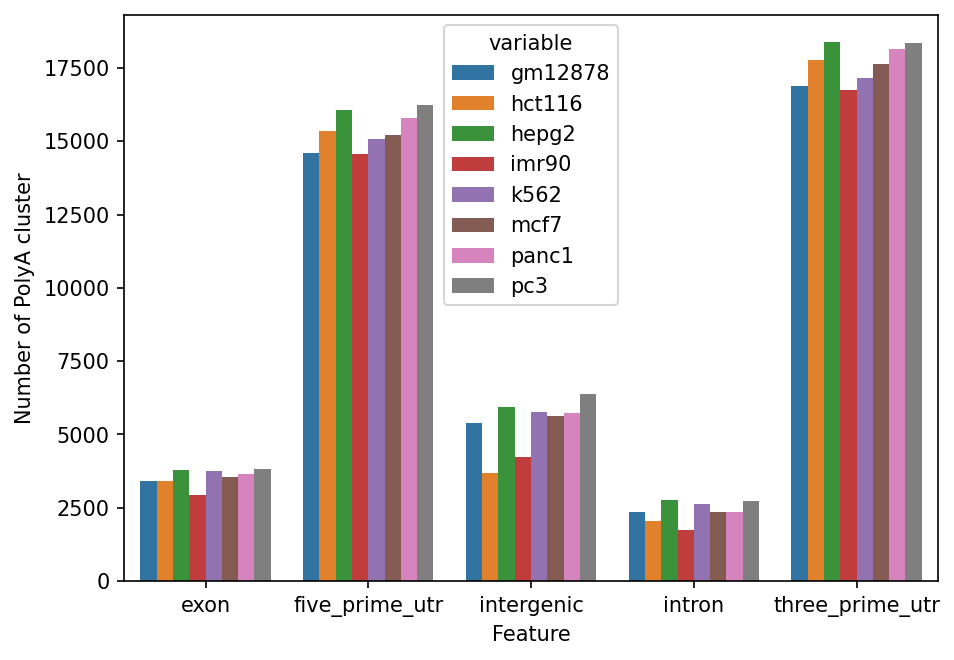

In [8]:
import matplotlib.pyplot as plt

plt.figure(dpi=150, figsize=(7, 5))
sns.barplot(data=df, x='Feature', y='value', hue='variable')
plt.ylabel('Number of PolyA cluster')

In [10]:
from longread_postprocessing.utils.io import read_talon_read_annot

df_alignment = read_talon_read_annot('data/resources/pilot_talon_read_annot.tsv')

In [11]:
lines = list()

for i in cell_lines:
    _df = apa[i]
    _df[i] = 1

    _df = _df.groupby('sample').count()
    lines.append(_df[i])

KeyError: 'sample'

In [26]:
total_all = dict()


for i in cell_lines:
    total_all[i] = df_alignment[df_alignment['sample'] == i].shape[0]

In [46]:
df_alignment[df_alignment['sample'] == i].shape[0]

1905298

In [47]:
df_alignment.shape

(13530095, 23)

In [28]:
df = pd.DataFrame([
    total, 
    total_all
])

In [31]:
df = df.T

In [33]:
df.columns = ['clustered', 'not_clustered']

In [35]:
df['not_clustered'] - df['clustered']

gm12878    -6870596
hct116     -6991316
hepg2     -13591372
imr90      -5489556
k562       -8408024
mcf7       -8077836
panc1      -6640048
pc3        -7910463
dtype: int64

In [36]:
df

,clustered,not_clustered
gm12878,8358079,1487483
hct116,8378208,1386892
hepg2,16047995,2456623
imr90,6650832,1161276
k562,10317730,1909706
mcf7,9717188,1639352
panc1,8223513,1583465
pc3,9815761,1905298
